# Project Brief On Insurance Dataset On Customers

An insurance company would like to know some information on its existing customers. The company would like to know who to try to upsell to.

# Import Packages

In [0]:
# Import libraries:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# SQL Data Pull

In [9]:
pip install pymysql

     |████████████████████████████████| 51kB 1.4MB/s 


In [0]:
import pymysql

In [11]:
# Connect to database
# Log in details not shown

'''
conn = pymysql.connect(host=, 
                       port=, 
                       user=, 
                       passwd=, 
                       db = )
'''

'\nconn = pymysql.connect(host=, \n                       port=, \n                       user=, \n                       passwd=, \n                       db = )\n'

In [12]:
# Extract from customer table in insurance database
insurance = pd.read_sql("SELECT * FROM customer", conn)

NameError: ignored

In [0]:
insurance

# Save Data Into .csv


In [0]:
# Save full insurance customers data as .csv 

insurance.to_csv('insurance_customers.csv', index=False)

# Import .csv Insurance Data

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Import SQL data:
# Used SELECT * FROM customer in insurance database

insurance_data = pd.read_csv('/content/drive/My Drive/insurance_customers.csv')

In [15]:
# Check head:

insurance_data.head()

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,2764,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6980,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7646,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2814,No,Basic,Bachelor,2002-03-11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [16]:
# Insurance data shape

insurance_data.shape

(9134, 24)

In [17]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer_Lifetime_Value          9134 non-null int64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective_To_Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location_Code                    9134 non-null object
Marital_Status                   9134 non-null object
Monthly_Premium_Auto             9134 non-null int64
Months_Since_Last_Claim          9134 non-null int64
Months_Since_Policy_Inception    9134 non-null int64
Number_of_Open_Complaints        9134 non-null int64
Number_of_Policies               91

# Not Using Categorical Variables In Clustering / Note About Missing Contextual Information

I have decided not to use categorical variables in the clustering. 

A lot of the categorical variables are not needed. In addition, it is not known about the context of these variables. There is no associated information of the insurance products given. What is Special Auto? What are the coverages for Basic, Extended and Premium plans? What are the prices for each policy? And the list goes on.

There is missing information on customer's driving history, what car they drive, car milage, etc. This information can be used to determine if the customer's insurance plan can be upgraded or not. Dataset information on Vehicle_Class and Vehicle Size is something at least. (SUVs cost more to repair so can charge higher premium.)


# Seaborn Pair Plots 

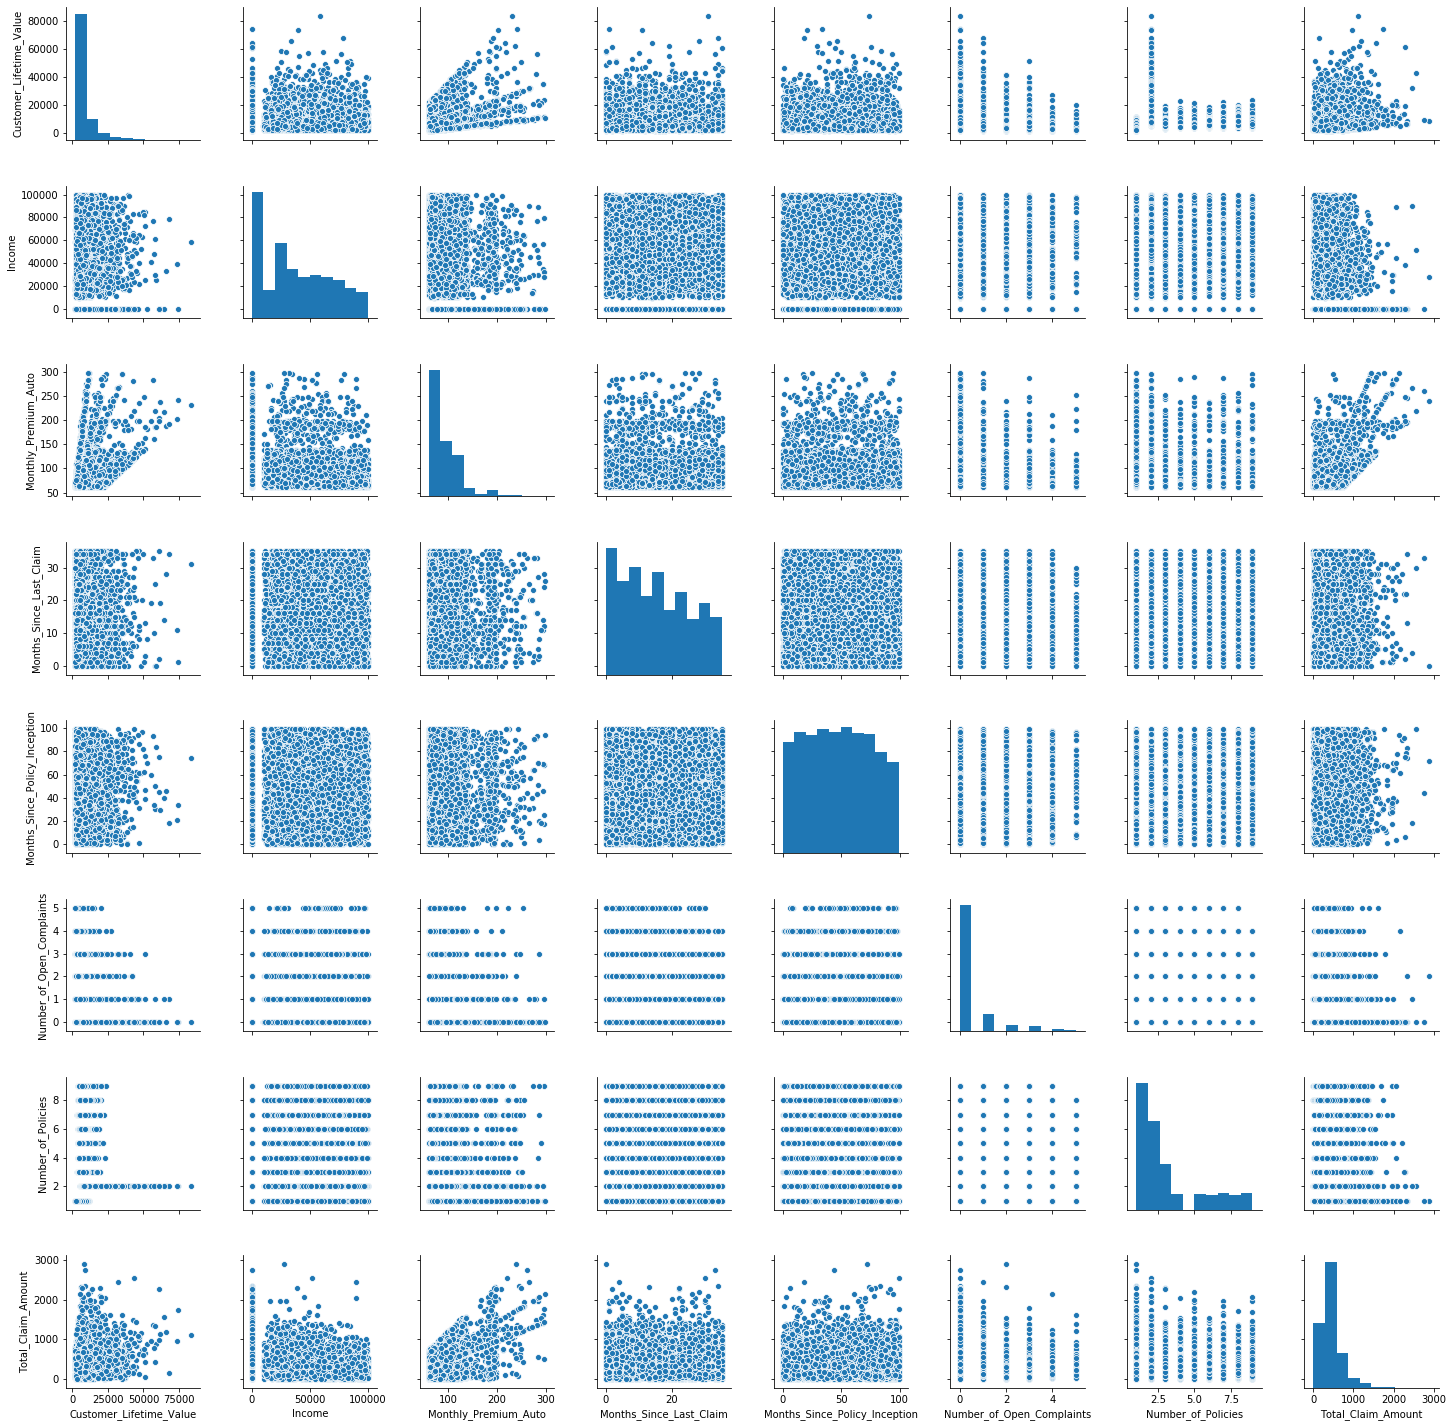

In [18]:
sns.pairplot(insurance_data)

## Observations

* Income seems to have little correlation on Total_Claim_Amount
* Low positive correlation from Customer Lifetime Value To Total Claim Amount
* Higher Monthly Premium auto payments leads to higher total claim amounts. But a large chunk are less than 150 / mth and less than 1200 for total claim amount.

---

* Higher Income does not mean higher monthly auto insurance expenses. (Could upsell to higher incomes)
* Seems to be at most a medium positive relationship between Monthly_Premium_Auto and Total_Claim_Amount.
* Higher monthly auto premiums leads to higher customer lifetime values (Medium + correlation).


# Correlation Matrix On Numerical Variables

In [0]:
# Numerical variables:

all_num_vars = ['Customer_Lifetime_Value', 'Income', 'Total_Claim_Amount',
            'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
            'Number_of_Open_Complaints', 'Number_of_Policies',
            'Monthly_Premium_Auto']

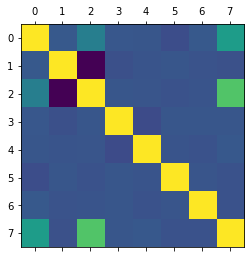

In [20]:
plt.matshow(insurance_data[all_num_vars].corr())
plt.show()

In [21]:
# Better correlation matrix plot
# Reference: https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas

corr = insurance_data[all_num_vars].corr()

corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Customer_Lifetime_Value,Income,Total_Claim_Amount,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Monthly_Premium_Auto
Customer_Lifetime_Value,1,0.024,0.23,0.012,0.0094,-0.036,0.022,0.4
Income,0.024,1,-0.36,-0.027,-0.00088,0.0064,-0.0087,-0.017
Total_Claim_Amount,0.23,-0.36,1,0.0076,0.0033,-0.014,-0.0024,0.63
Months_Since_Last_Claim,0.012,-0.027,0.0076,1,-0.043,0.0054,0.0091,0.005
Months_Since_Policy_Inception,0.0094,-0.00088,0.0033,-0.043,1,-0.0012,-0.013,0.02
Number_of_Open_Complaints,-0.036,0.0064,-0.014,0.0054,-0.0012,1,0.0015,-0.013
Number_of_Policies,0.022,-0.0087,-0.0024,0.0091,-0.013,0.0015,1,-0.011
Monthly_Premium_Auto,0.4,-0.017,0.63,0.005,0.02,-0.013,-0.011,1


In [22]:
pip install imgkit

  Created wheel for imgkit: filename=imgkit-1.0.2-cp36-none-any.whl size=6591 sha256=4db926268976233d8453b26af1815221661446d8873860f56ed9bc54d0259857
  Stored in directory: /root/.cache/pip/wheels/64/34/8e/1719358e8263f9f33217b9f11d1a70d9e122b75afa5732f032
Successfully built imgkit


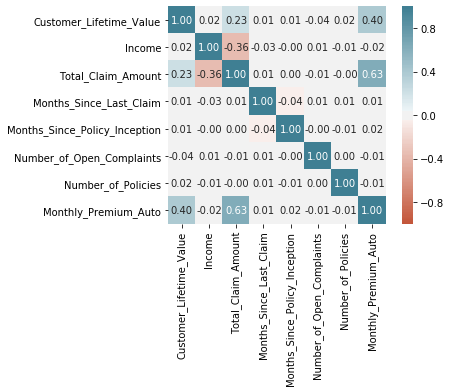

In [23]:
# Code references: 
# https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
# https://ajh1143.github.io/Corr/
# Not sure why output looks bad.

sns.heatmap(insurance_data[all_num_vars].corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    fmt=".2f"
)

#plt.savefig('corr_matrix.png', dpi=300, bbox_inches = "tight")

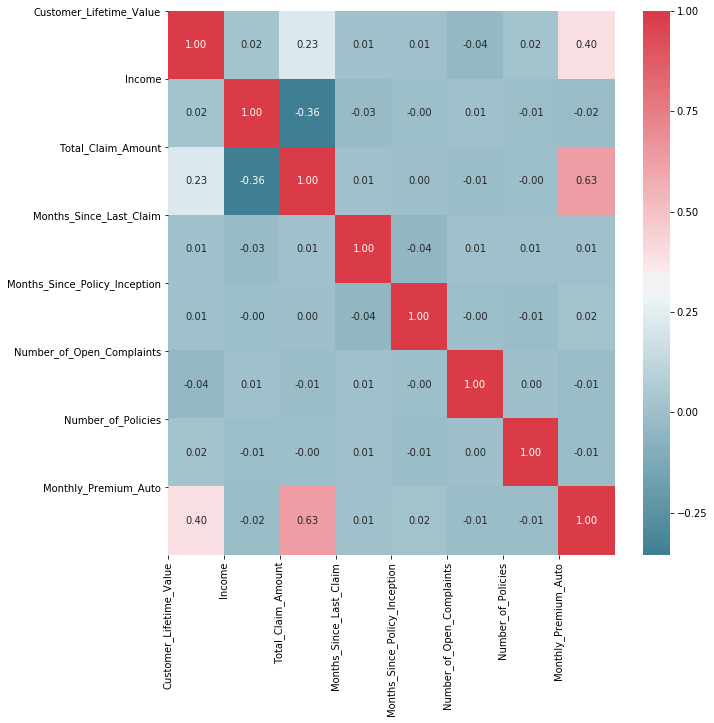

In [24]:
# Create Correlation df
    corr = insurance_data[all_num_vars].corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

## Correlation Matrix Results

Many of the pairwise correlations are below < 0.20 in absolute value. 

Some pairs that stand out here with correlations include:

* Customer Lifetime Value vs Monthly Premium Auto (0.40)
* Income vs Total Claim Amount (- 0.36)
* Total Claim Amount Vs Monthly Premium Auto (0.63)

# Gaussian Mixture Model Ellipse Code

In [0]:
from matplotlib.patches import Ellipse

In [0]:
def draw_ellipse(position, covariance, ax = None, **kwargs):
  '''
  Draw an ellipse with a given position and covariance
  '''
  
  ax = ax or plt.gca()
  
  # Convert covariance to principal axes
  if covariance.shape == (2,2): # For full and tied covariance type
    U, s, Vt = np.linalg.svd(covariance)
    angle = np.degrees(np.arctan2(U[1,0], U[0,0]))
    width, height = 2 * np.sqrt(s)
  
  elif covariance.shape == (2,): # for diag covariance type
    angle = 0
    width, height = 2 * np.sqrt(covariance)
  
  else: # for spherical covariance type
    angle = 0
    width = 2 * np.sqrt(covariance)
    height = width
    
  #Draw the ellipse
  for nsig in range(1,4):
    ax.add_patch(Ellipse(position, 
                         nsig * width, 
                         nsig * height, 
                         angle, **kwargs))
    
def plot_gmm(gmm, X, label=True, ax = None):
  
  assert isinstance(gmm, GaussianMixture), 'model needs to be a GaussianMixture object'
  assert isinstance(X, np.ndarray), f'X needs to be an Numpy array'
  ax = ax or plt.gca()
  labels = gmm.fit(X).predict(X)
  
  if label:
    ax.scatter(X[:, 0],
               X[:, 1],
               c=labels, 
               s=40, 
               cmap='viridis', 
               zorder=2)
  else:
    ax.scatter(X[:,0], X[:,1], s = 40, zorder = 2)
    
  ax.axis('equal')
  
  w_factor = 0.2/gmm.weights_.max()
  
  if gmm.covariance_type != 'tied': # for full, diag, spherical covariance type
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
      draw_ellipse(pos, covar, ax = ax, alpha = w * w_factor)
  
  else: # for tied covariance type
    for pos, covar, w in zip(gm_model_tied.means_,
                             [gm_model_tied.covariances_] * gm_model_tied.n_components, 
                             gm_model_tied.weights_):
      draw_ellipse(pos, covar, ax = ax, alpha = w * w_factor)
  
  ax.set_title(gmm.covariance_type)

# Using PCA To Check Loading Scores For Feature Selection - Target As Monthly_Premium_Auto


This dataset (insurance customers table is quite large), principal component analysis can be used to look at which features contribute to each principal component.

Recall that a principal component is a line (linear combination) of all the variables.



I am choosing my target variable ($y$) to be the `Monthly_Premium_Auto` amount.

In [0]:
# Numerical variables:

num_vars = ['Customer_Lifetime_Value', 'Income', 'Total_Claim_Amount',
            'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
            'Number_of_Open_Complaints', 'Number_of_Policies']

In [0]:
# Set variables:

# X with numerical variables
# y with Monthly premium auto prices

X = insurance_data[num_vars]
y = insurance_data.Monthly_Premium_Auto

In [0]:
# Standard Scaler:

std_scale = StandardScaler()

X_scale = std_scale.fit_transform(X)

In [0]:
# Use scree plot to determine number of components
# Code from class:

# Scree plot function:

def scree_plot(scaled_data):
  '''
  Function takes in a fitted and transformed data. Output is a scree plot
  of the explained variance proportion of the principal components (PCs)
  '''
  try:
    pca = PCA()
    x_scale_pca = pca.fit_transform(X_scale)
    sns.barplot(x = ['PC' + str(num) for num 
                   in range(1, len(pca.explained_variance_ratio_) + 1)], 
                y = pca.explained_variance_ratio_,
                color = 'blue',
                alpha = 0.6)
    plt.xlabel('\n Principal Component')
    plt.ylabel('Explained Variance Proportion \n')
    # Title
    plt.title('Explained Variance By Principal Component \n')
  except:
    print('An exception occurred.')

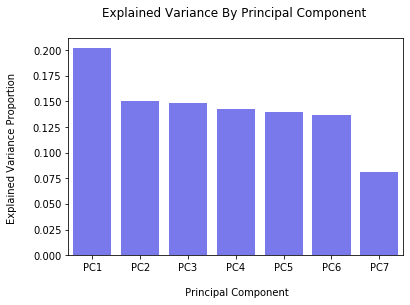

In [31]:
scree_plot(X_scale)

In [32]:
# Do PCA to 90% explained variance
# Ends up being 6 components:

pca_6 = PCA(n_components = 0.90)
pca_6.fit(X_scale)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [33]:
# Number of PCs that will explain more than n_components:

pca_6.n_components_

6

In [34]:
pca_6.explained_variance_ratio_

array([0.20202986, 0.15031939, 0.14852011, 0.14226855, 0.13957136,
       0.13641638])

In [35]:
pca_6.explained_variance_ratio_.sum()

0.9191256446700464

In [36]:
# Look at column variables again:

num_vars

['Customer_Lifetime_Value',
 'Income',
 'Total_Claim_Amount',
 'Months_Since_Last_Claim',
 'Months_Since_Policy_Inception',
 'Number_of_Open_Complaints',
 'Number_of_Policies']

In [37]:
pca_6.components_

array([[ 0.36305734, -0.59436893,  0.71148733,  0.06035784,  0.00824409,
        -0.06465315,  0.02845457],
       [ 0.38673963,  0.24932835,  0.02903755, -0.57255471,  0.5805474 ,
        -0.32191424, -0.13762881],
       [ 0.56978527,  0.38390105, -0.04331754,  0.31465726, -0.34407475,
        -0.37677641,  0.40832737],
       [ 0.04859843,  0.0019491 ,  0.01016953, -0.2246517 ,  0.22495442,
         0.53088978,  0.7839733 ],
       [ 0.46638242,  0.28349627,  0.05261333,  0.26435896,  0.09084298,
         0.66147943, -0.42855104],
       [ 0.1164045 ,  0.05649466,  0.07322721, -0.66926202, -0.69682806,
         0.17443845, -0.11826393]])

In this case, maybe PCA not great with feature selection. But maybe look at average absolute loading scores for each column.

## Looking At Features Through PCA Results

Since I got 6 principal components I cannot really plot it out.

In [38]:
pcs_chart = pd.DataFrame(pca_6.components_, columns = num_vars, index = ['PC' + str(i) for i in range(1, 7, 1)])

pcs_chart

,Customer_Lifetime_Value,Income,Total_Claim_Amount,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies
PC1,0.363057,-0.594369,0.711487,0.060358,0.008244,-0.064653,0.028455
PC2,0.386740,0.249328,0.029038,-0.572555,0.580547,-0.321914,-0.137629
PC3,0.569785,0.383901,-0.043318,0.314657,-0.344075,-0.376776,0.408327
PC4,0.048598,0.001949,0.010170,-0.224652,0.224954,0.530890,0.783973
PC5,0.466382,0.283496,0.052613,0.264359,0.090843,0.661479,-0.428551
PC6,0.116405,0.056495,0.073227,-0.669262,-0.696828,0.174438,-0.118264


In [39]:
pcs_chart.iloc[0].apply(lambda x: abs(x)).nlargest(3)

Total_Claim_Amount         0.711487
Income                     0.594369
Customer_Lifetime_Value    0.363057
Name: PC1, dtype: float64

In [40]:
# For loop printing top three features (by absolute values of coefficients) per PC

for i in range(6):
    print(pcs_chart.iloc[i].apply(lambda x: abs(x)).nlargest(3))
    print('\n')

Total_Claim_Amount         0.711487
Income                     0.594369
Customer_Lifetime_Value    0.363057
Name: PC1, dtype: float64


Months_Since_Policy_Inception    0.580547
Months_Since_Last_Claim          0.572555
Customer_Lifetime_Value          0.386740
Name: PC2, dtype: float64


Customer_Lifetime_Value    0.569785
Number_of_Policies         0.408327
Income                     0.383901
Name: PC3, dtype: float64


Number_of_Policies               0.783973
Number_of_Open_Complaints        0.530890
Months_Since_Policy_Inception    0.224954
Name: PC4, dtype: float64


Number_of_Open_Complaints    0.661479
Customer_Lifetime_Value      0.466382
Number_of_Policies           0.428551
Name: PC5, dtype: float64


Months_Since_Policy_Inception    0.696828
Months_Since_Last_Claim          0.669262
Number_of_Open_Complaints        0.174438
Name: PC6, dtype: float64




**Notes**

Given that `Monthly_Premium_Auto` is the target variable.

`Total_Claim_Amount` is high in PC1.

`Customer_Lifetime_Value` appears in each of the first three principal components.

`Number_of_Open_Complaints` appears in each of the last three principal components.

`Number_of_Policies` appears as the highest contributing feature in PC4.



In [41]:
# Look at average loading scores per column/ feature 
# Take absolute value of each loading score:

pcs_chart.apply(lambda x : abs(x)).mean(axis = 0).sort_values(ascending = False)

Number_of_Open_Complaints        0.355025
Months_Since_Last_Claim          0.350974
Customer_Lifetime_Value          0.325161
Months_Since_Policy_Inception    0.324249
Number_of_Policies               0.317533
Income                           0.261590
Total_Claim_Amount               0.153309
dtype: float64

This table above is misleading as it is unknown which feature goes which principal component.

# PCA Loading Scores For Feature Selection - Target As Customer_Lifetime_Value

In [0]:
# Numerical variables:

num_vars2 = ['Monthly_Premium_Auto', 'Income', 'Total_Claim_Amount',
            'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
            'Number_of_Open_Complaints', 'Number_of_Policies']

In [0]:
# Set variables:

# X with numerical variables
# y with Monthly premium auto prices

X = insurance_data[num_vars2]
y = insurance_data.Customer_Lifetime_Value

In [0]:
# Standard Scaler:

std_scale2 = StandardScaler()

X_scale2 = std_scale2.fit_transform(X)

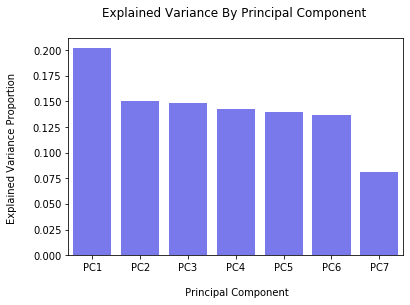

In [45]:
# Show scree plot:

scree_plot(X_scale2)

In [46]:
# Do PCA to 90% explained variance
# Ends up being 6 components:

pca_6b = PCA(n_components = 0.90)
pca_6b.fit(X_scale2)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [47]:
# Explained variance ratio (proportion):

pca_6b.explained_variance_ratio_

array([0.24764749, 0.15100031, 0.14276892, 0.14231078, 0.1398634 ,
       0.13615508])

In [48]:
pca_6b.explained_variance_ratio_.sum()

0.9597459896865834

## Looking At Features Through 2nd PCA Results

In [49]:
num_vars2

['Monthly_Premium_Auto',
 'Income',
 'Total_Claim_Amount',
 'Months_Since_Last_Claim',
 'Months_Since_Policy_Inception',
 'Number_of_Open_Complaints',
 'Number_of_Policies']

In [50]:
pcs_chart2 = pd.DataFrame(pca_6b.components_, columns = num_vars2, index = ['PC' + str(i) for i in range(1, 7, 1)])

pcs_chart2

,Monthly_Premium_Auto,Income,Total_Claim_Amount,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies
PC1,0.614900,-0.355343,0.702783,0.022966,0.019436,-0.027627,-0.007602
PC2,0.160455,0.283190,-0.000096,-0.639267,0.611602,-0.086024,-0.322395
PC3,0.045849,0.045195,0.015869,0.050492,0.065781,0.978998,-0.174041
PC4,-0.113766,-0.217962,0.006291,-0.292850,0.300157,0.162855,0.858565
PC5,0.421358,0.741573,0.025429,-0.106456,-0.383582,0.036403,0.334793
PC6,0.148497,0.283325,-0.028246,0.700756,0.619501,-0.074519,0.128389


In [51]:
# For loop printing top three contributing
# features (by abs values of coefficients) per PC

for i in range(6):
    print(pcs_chart2.iloc[i].apply(lambda x: abs(x)).nlargest(3))
    print('\n')

Total_Claim_Amount      0.702783
Monthly_Premium_Auto    0.614900
Income                  0.355343
Name: PC1, dtype: float64


Months_Since_Last_Claim          0.639267
Months_Since_Policy_Inception    0.611602
Number_of_Policies               0.322395
Name: PC2, dtype: float64


Number_of_Open_Complaints        0.978998
Number_of_Policies               0.174041
Months_Since_Policy_Inception    0.065781
Name: PC3, dtype: float64


Number_of_Policies               0.858565
Months_Since_Policy_Inception    0.300157
Months_Since_Last_Claim          0.292850
Name: PC4, dtype: float64


Income                           0.741573
Monthly_Premium_Auto             0.421358
Months_Since_Policy_Inception    0.383582
Name: PC5, dtype: float64


Months_Since_Last_Claim          0.700756
Months_Since_Policy_Inception    0.619501
Income                           0.283325
Name: PC6, dtype: float64




**Note**

Target is `Customer_Lifetime_Value`. 

In PC1, `Total_Claim_Amount` and `Monthly_Premium_Auto` are top.

`Income` appears in the first principal component and in PC5 and PC6.



In [52]:
# Look at average loading scores per column/ feature 
# Remember that average assumes equal weights
# Take absolute value of each loading score:

pcs_chart2.apply(lambda x : abs(x)).mean(axis = 0).sort_values(ascending = False)

Months_Since_Policy_Inception    0.333343
Income                           0.321098
Number_of_Policies               0.304297
Months_Since_Last_Claim          0.302131
Monthly_Premium_Auto             0.250804
Number_of_Open_Complaints        0.227738
Total_Claim_Amount               0.129786
dtype: float64

# 1) Income Vs Monthly Premiums Scatterplot

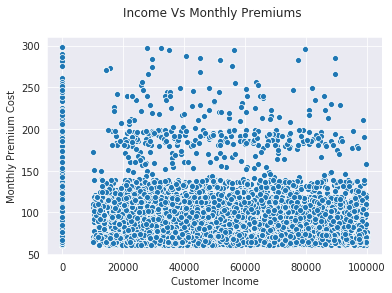

In [53]:
sns.set_style('darkgrid')

sns.scatterplot(x = 'Income', y = 'Monthly_Premium_Auto', data = insurance_data)
plt.xlabel('Customer Income')
plt.ylabel('Monthly Premium Cost')
plt.title('Income Vs Monthly Premiums \n')

plt.savefig('initial_scatterplot_incprem.png', dpi=300, bbox_inches = "tight")

Note that the line at Income = 0 represents customers who are unemployed.

It appears that there is no correlation between income and monthly premiums. 

Not known if customers are on fixed income. Looking at the unemployed case, customers who were paying monthly premiums have no income.

What is intriguing from the insurance business perspective is those on higher incomes say (50000+) are paying similar monthly premiums vs lower incomes. This is a business opportunity to upsell to these higher incomes.

### Clustering On Income Vs Monthly Premiums

#### Gaussian Mixture Model 

In [0]:
# Set the variable:

X = insurance_data[['Income', 'Monthly_Premium_Auto']]

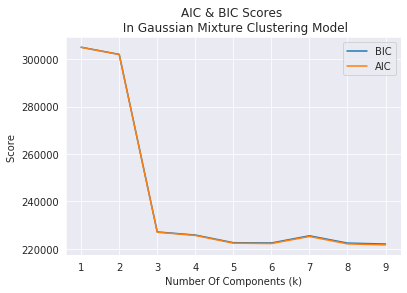

In [55]:
n_components = np.arange(1, 10)

gm_model_loop = [GaussianMixture(n, covariance_type = 'full',
                                random_state = 0).fit(X) 
                   for n in n_components]

plt.plot(n_components, [m.bic(X) for m in gm_model_loop], label = 'BIC')
plt.plot(n_components, [m.aic(X) for m in gm_model_loop], label = 'AIC')

# Labels:

plt.legend(loc = 'best')
plt.xlabel('Number Of Components (k)')
plt.ylabel('Score ')
plt.title('AIC & BIC Scores \n In Gaussian Mixture Clustering Model')

plt.savefig('aic_bic_gmm.png', dpi=300, bbox_inches = "tight")

Three components can be selected. It does not really matter between choosing BIC or AIC.

In [56]:
# Gaussian Mixture Model For Clustering

gm_model1 = GaussianMixture(covariance_type = 'full',
                           verbose = 2,
                           verbose_interval = 1,
                           n_components = 3,
                           random_state = 42)

gm_model1.fit(X)

Initialization 0
  Iteration 1	 time lapse 0.03157s	 ll change inf
  Iteration 2	 time lapse 0.00661s	 ll change 0.11343
  Iteration 3	 time lapse 0.00657s	 ll change 0.32317
  Iteration 4	 time lapse 0.00639s	 ll change 3.51220
  Iteration 5	 time lapse 0.00671s	 ll change 0.00600
  Iteration 6	 time lapse 0.00661s	 ll change 0.00785
  Iteration 7	 time lapse 0.00666s	 ll change 0.00842
  Iteration 8	 time lapse 0.00658s	 ll change 0.00693
  Iteration 9	 time lapse 0.00660s	 ll change 0.00525
  Iteration 10	 time lapse 0.00675s	 ll change 0.00368
  Iteration 11	 time lapse 0.00714s	 ll change 0.00261
  Iteration 12	 time lapse 0.00643s	 ll change 0.00221
  Iteration 13	 time lapse 0.00649s	 ll change 0.00222
  Iteration 14	 time lapse 0.00673s	 ll change 0.00245
  Iteration 15	 time lapse 0.00620s	 ll change 0.00284
  Iteration 16	 time lapse 0.00454s	 ll change 0.00330
  Iteration 17	 time lapse 0.00444s	 ll change 0.00379
  Iteration 18	 time lapse 0.00440s	 ll change 0.00419
  Iter

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=42, reg_covar=1e-06, tol=0.001, verbose=2,
                verbose_interval=1, warm_start=False, weights_init=None)

Initialization 0
  Iteration 1	 time lapse 0.02815s	 ll change inf
  Iteration 2	 time lapse 0.00753s	 ll change 0.11343
  Iteration 3	 time lapse 0.00755s	 ll change 0.32317
  Iteration 4	 time lapse 0.00721s	 ll change 3.51220
  Iteration 5	 time lapse 0.00725s	 ll change 0.00600
  Iteration 6	 time lapse 0.00701s	 ll change 0.00785
  Iteration 7	 time lapse 0.00626s	 ll change 0.00842
  Iteration 8	 time lapse 0.00616s	 ll change 0.00693
  Iteration 9	 time lapse 0.00618s	 ll change 0.00525
  Iteration 10	 time lapse 0.00666s	 ll change 0.00368
  Iteration 11	 time lapse 0.00640s	 ll change 0.00261
  Iteration 12	 time lapse 0.01007s	 ll change 0.00221
  Iteration 13	 time lapse 0.00665s	 ll change 0.00222
  Iteration 14	 time lapse 0.00629s	 ll change 0.00245
  Iteration 15	 time lapse 0.00447s	 ll change 0.00284
  Iteration 16	 time lapse 0.00432s	 ll change 0.00330
  Iteration 17	 time lapse 0.00428s	 ll change 0.00379
  Iteration 18	 time lapse 0.00431s	 ll change 0.00419
  Iter

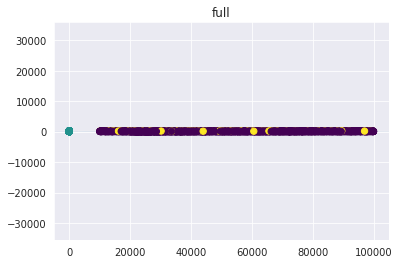

In [57]:
# Function call:

plot_gmm(gm_model1, X.values)

##### Gaussian Mixture Model (GMM) Not Great

Plot looks bad. Not sure how to interpret. Trying a different model.

#### DBSCAN

In [0]:
# Set the variable:

X = insurance_data[['Income', 'Monthly_Premium_Auto']]

In [0]:
# Scale data:

db_scaler1 = StandardScaler()

# Fit & transform data:

X_scale1 = db_scaler1.fit_transform(X)

In [0]:
metric_list = ['cosine', 'manhattan', 'euclidean']

db_model_metric_list1 = [DBSCAN(metric = method).fit(X_scale1) for method in metric_list]

db_model_metric_labels1 = [model.labels_ for model in db_model_metric_list1]

In [0]:
# Obtain silhouette scores while removing noise (-1):

silhouette_metric_list = []

for metric, label in zip(metric_list, db_model_metric_labels1):
  try:
    score = silhouette_score(X_scale1[label != -1],
                             label[label != -1],
                             metric = metric)
  except:
    score = np.nan
  silhouette_metric_list.append(score)

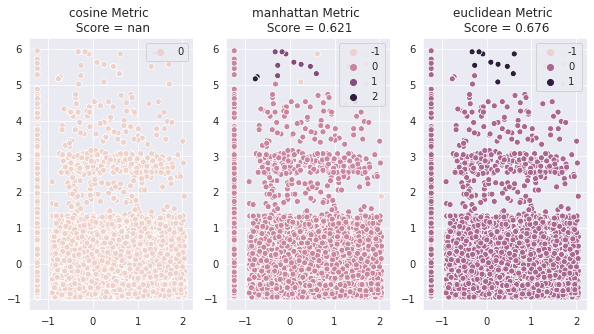

In [62]:
fig, axs = plt.subplots(1, 3, figsize = (10, 5))

for metric, label, score, ax in zip(metric_list, 
                                    db_model_metric_labels1,
                                    silhouette_metric_list,
                                    axs.ravel()):
  sns.scatterplot(X_scale1[:, 0],
                  X_scale1[:, 1],
                  hue = label,
                  ax = ax)
  ax.set_title(f'{metric} Metric \n Score = {score:.3f}')

plt.savefig('dbscan_threeplots.png', dpi=300, bbox_inches = "tight")

##### DBSCAN Not Great

I don't like this clustering at all. The manhattan metric gives an okay number of clusters but overall DBSCAN looks bad here.

#### Hierarchical Clustering Removed - Takes Too Long

#### K-Means Clustering

In [0]:
# Set the variable:

X = insurance_data[['Income', 'Monthly_Premium_Auto']]

In [0]:
# Scale data:

kmeans_scaler = StandardScaler()

# Fit & transform data:

X_scale_k = kmeans_scaler.fit_transform(X)

In [0]:
# Set range for K:

k_value = range(1, 10)

# Make a list of all the Kmean models:

kmean_all_list = [KMeans(n_clusters = k, random_state = 42).fit(X_scale_k) 
                  for k in k_value]

# List of inertias:

kmean_all_inertia = [model.inertia_ for model in kmean_all_list]

Text(0.5, 1.0, 'K Vs Inertia On Income vs Monthly Premiums\n')

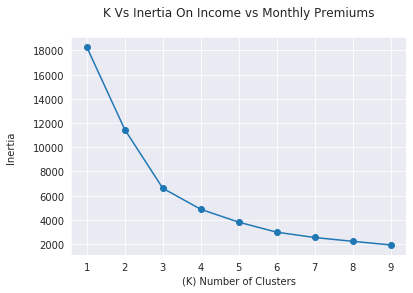

In [66]:
# Scatterplot of inertias:

plt.scatter(k_value, kmean_all_inertia)
plt.plot(k_value, kmean_all_inertia)

# Add Labels:
plt.xlabel('(K) Number of Clusters')
plt.ylabel('Inertia \n')

plt.title('K Vs Inertia On Income vs Monthly Premiums\n')

Can choose 3 or 4 clusters.

##### KMeans With 3 Clusters

In [67]:
kmeans_income_mth_3 = KMeans(n_clusters = 3, random_state = 42)

kmeans_income_mth_3.fit(X_scale_k)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [68]:
kmeans_income_mth_3.inertia_

6613.36579959582

In [69]:
# A sample of labels
kmeans_income_mth_3.labels_[:10]

array([2, 0, 2, 0, 2, 2, 2, 0, 0, 0], dtype=int32)

In [70]:
# Cluster centers:

kmeans_income_mth_3.cluster_centers_

array([[-0.73530572, -0.1810876 ],
       [-0.06084261,  3.06803675],
       [ 1.020413  , -0.18997932]])

In [71]:
# Create dataframe but with labels:

kmeans_model_income_prem_df = X

kmeans_model_income_prem_df['label'] = kmeans_income_mth_3.labels_

kmeans_model_income_prem_df.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Income,Monthly_Premium_Auto,label
9129,71941,73,2
9130,21604,79,0
9131,0,85,0
9132,21941,96,0
9133,0,77,0


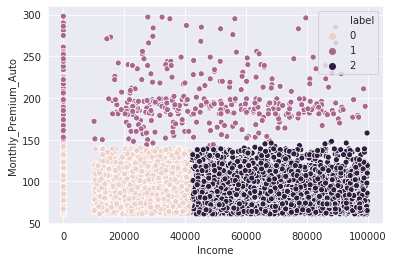

In [72]:
# Plot Of Labeled Clusters

sns.scatterplot(x = 'Income',
                y = 'Monthly_Premium_Auto',
                hue = 'label',
                data = kmeans_model_income_prem_df)

**Aggregate Metrics Of Clusters**

In [73]:
kmeans_model_income_prem_df.groupby('label').agg({'Income': 
                                           ['count', 'mean', 'median', 'std', 'min', 'max'],
                                        'Monthly_Premium_Auto': 
                                           ['mean', 'median', 'std','min', 'max']})

Income                                       ... Monthly_Premium_Auto                     
       count          mean   median           std  ...               median        std  min  max
label                                              ...                                          
0       4989  15320.085187  17101.0  14778.506397  ...                   80  21.888548   61  148
1        519  35809.088632  34087.0  28535.637203  ...                  192  33.411022  143  298
2       3626  68655.732763  67603.5  16126.445771  ...                   79  21.737819   61  158

[3 rows x 11 columns]

###### Notes 

* Lilac cluster: Lower end on income, avg mth auto price at $86 (Don't upsell)
* Black cluster: Existing customers paying more than 150/mth regardless of income.
* Violet cluster: Higher income than lilac cluster but paying less than 150/ month. Can try to upsell / cross sell here.

##### K-Means With 4 Clusters

In [74]:
kmeans_income_mth_4 = KMeans(n_clusters = 4, random_state = 42)

kmeans_income_mth_4.fit(X_scale_k)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [75]:
kmeans_income_mth_4.inertia_

4874.683054508562

In [76]:
# A sample of labels
kmeans_income_mth_4.labels_[:10]

array([0, 1, 0, 1, 2, 0, 0, 1, 2, 1], dtype=int32)

In [77]:
# Cluster centers:

kmeans_income_mth_4.cluster_centers_

array([[ 1.10048749, -0.21950237],
       [-0.65153328,  0.59646374],
       [-0.68449292, -0.62106838],
       [ 0.01689138,  3.18365242]])

In [78]:
# Create dataframe but with labels:

kmeans_model_income_prem_df2 = X

kmeans_model_income_prem_df2['label'] = kmeans_income_mth_4.labels_

kmeans_model_income_prem_df2.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Income,Monthly_Premium_Auto,label
9129,71941,73,0
9130,21604,79,2
9131,0,85,2
9132,21941,96,1
9133,0,77,2


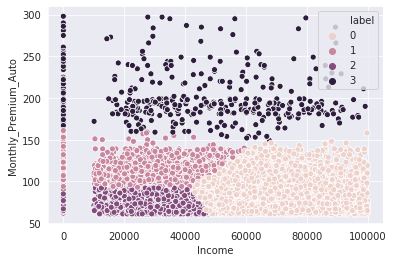

In [79]:
# Plot Of Labeled Clusters

sns.scatterplot(x = 'Income',
                y = 'Monthly_Premium_Auto',
                hue = 'label',
                data = kmeans_model_income_prem_df2)

In [80]:
kmeans_model_income_prem_df2.groupby('label').agg({'Income': ['count', 'mean', 'median', 'std'],
                                        'Monthly_Premium_Auto': ['mean', 'median', 'std']})

Income                         ... Monthly_Premium_Auto                  
       count          mean   median  ...                 mean median        std
label                                ...                                       
0       3276  71096.222527  70137.5  ...            85.662393     78  20.743292
1       2092  17877.908700  19214.5  ...           113.735182    112  13.691017
2       3290  16863.688754  20049.5  ...            71.850760     70   8.623289
3        476  38170.510504  37532.0  ...           202.756303    193  31.981828

[4 rows x 7 columns]

#### K-Means Clustering With Removing Unemployed

In [0]:
# Set the variable:

X = insurance_data[['Income', 'Monthly_Premium_Auto']]


In [0]:
# Filter out cases where Income = 0 (Unemployed):

X_unemp = X[X.Income > 0]

In [0]:
# Scale data:

kmeans_unemp_scaler = StandardScaler()

# Fit & transform data:

X_scale_unemp_k = kmeans_unemp_scaler.fit_transform(X_unemp)

In [0]:
# Set range for K:

k_value = range(1, 10)

# Make a list of all the Kmean models:

kmean_all_list_unemp = [KMeans(n_clusters = k, random_state = 42).fit(X_scale_unemp_k) 
                        for k in k_value]

# List of inertias:

kmean_unemp_inertia = [model.inertia_ for model in kmean_all_list_unemp]

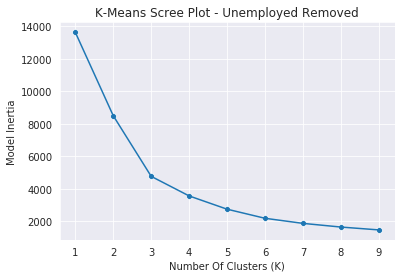

In [85]:
# Scatterplot of inertias for Incomes > 0 Case:

sns.scatterplot(x = k_value, y = kmean_unemp_inertia)
sns.lineplot(x = k_value, y = kmean_unemp_inertia)
plt.xlabel('Number Of Clusters (K)')
plt.ylabel('Model Inertia')
plt.title('K-Means Scree Plot - Unemployed Removed')

plt.savefig('kmeans_scree.png', dpi=300, bbox_inches = "tight")

Can do 3 or 4 clusters as well. I am choosing three here.

In [0]:
# Fit KMeans modesl with three clusters

kmeans_unemp_three_cl = KMeans(n_clusters = 3, random_state = 42).fit(X_scale_unemp_k) 

In [87]:
# Inertia

kmeans_unemp_three_cl.inertia_

4774.145090116736

In [88]:
# Create dataframe with labels for plotting

kmeans_unemp_inc_mth_df = X_unemp

kmeans_unemp_inc_mth_df['label'] = kmeans_unemp_three_cl.labels_

kmeans_unemp_inc_mth_df.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Income,Monthly_Premium_Auto,label
9127,66367,64,0
9128,47761,104,1
9129,71941,73,0
9130,21604,79,1
9132,21941,96,1


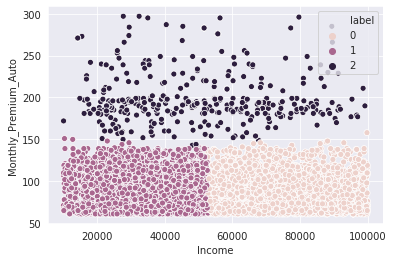

In [89]:
# Scatterplot With 3 clusters:

sns.scatterplot(x = 'Income',
                y = 'Monthly_Premium_Auto',
                hue = 'label',
                data = kmeans_unemp_inc_mth_df)

In [90]:
kmeans_unemp_inc_mth_df.groupby('label').agg({'Income': ['count', 'mean', 'median', 'std'],
                                        'Monthly_Premium_Auto': ['mean', 'median', 'std']})

Income                       ... Monthly_Premium_Auto                  
       count          mean median  ...                 mean median        std
label                              ...                                       
0       2885  74118.226690  72988  ...            86.756672     79  21.622495
1       3556  31397.507030  29732  ...            86.486220     79  21.729046
2        376  49153.962766  48528  ...           201.837766    193  33.579403

[3 rows x 7 columns]

# 2) Scatterplot - Mth Premiums Vs Total Claims Amt 

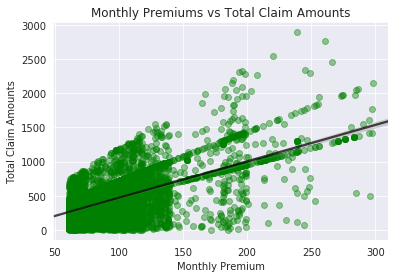

In [91]:
# Reference: https://medium.com/@kathy.lu.rentals/visualizing-with-seaborn-regplot-2235ccbaedd4

sns.regplot(x = 'Monthly_Premium_Auto', y = 'Total_Claim_Amount', 
                data = insurance_data,
                scatter_kws = {'color': 'green', 'alpha': 0.4}, 
                line_kws = {'color': 'black', 'alpha': 0.7})

plt.xlabel('Monthly Premium')
plt.ylabel('Total Claim Amounts')
plt.title('Monthly Premiums vs Total Claim Amounts')

plt.savefig('premiums_totalclaims_scatter.png', dpi=300, bbox_inches = "tight")

Inside this scatterplot, there is a upward sloping row of points that looks like a line. Strange.



# 3) Scatterplot (Regplot) - Mth Premiums Vs Customer Life Value 

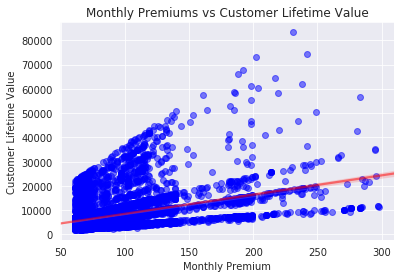

In [92]:
# Ref: https://medium.com/@kathy.lu.rentals/visualizing-with-seaborn-regplot-2235ccbaedd4

sns.regplot(x = 'Monthly_Premium_Auto', y = 'Customer_Lifetime_Value', 
            data = insurance_data,
            scatter_kws = {'color': 'b', 'alpha': 0.5}, 
            line_kws = {'color': 'red', 'alpha': 0.5})

plt.xlabel('Monthly Premium')
plt.ylabel('Customer Lifetime Value')
plt.title('Monthly Premiums vs Customer Lifetime Value')

plt.savefig('premiums_clv_scatter.png', dpi=300, bbox_inches = "tight")

In general, a higher monthly premium auto leads to a higher customer lifetime value. Looks like a medium correlation.

Trying to upsell customers to a higher payment can increase customer lifetime value.

# 4) Scatterplot - Income Vs Customer Lifetime Value (Not Useful)

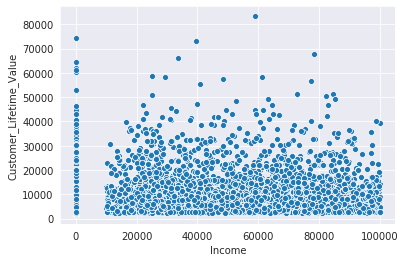

In [93]:
sns.scatterplot(x = 'Income', y = 'Customer_Lifetime_Value', data = insurance_data)

It appears that there is very little correlation between income and customer lifetime value. No need to go further here.


# Correlation Matrix Again But With Income, Mth Premiums, CLV, Total Claims Amt


In [0]:
num_vars2 = ['Customer_Lifetime_Value', 'Income', 
             'Total_Claim_Amount',
            'Monthly_Premium_Auto']
          

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text xticklabel objects>)

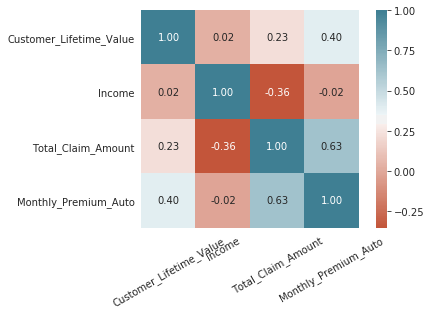

In [95]:
sns.heatmap(insurance_data[num_vars2].corr(), 
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    fmt=".2f"
)
plt.xticks(rotation=30)


# Trying Clustering On Income, Mth Premiums, CLV, Total Claims Amt

## K-Means Clustering

In [0]:
# Set the variable:

X2 = insurance_data[['Customer_Lifetime_Value', 'Income', 
                    'Total_Claim_Amount', 'Monthly_Premium_Auto']]

In [0]:
# Standard Scaler:

scaler_X2 = StandardScaler()

# Fit & transform data:

X2_scale = db_scaler1.fit_transform(X2)

In [0]:
# Values for k:

k_vals = range(1, 10)

kmean_models_X2 = [KMeans(n_clusters = k, random_state = 42).fit(X2_scale)
                   for k in k_vals]

kmean_inertias_X2 = [model.inertia_ for model in kmean_models_X2]

Text(0.5, 1.0, 'Scree Plot - Number Of Clusters Vs Inertia')

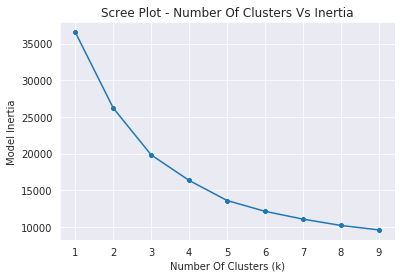

In [99]:
# Scree plot:

sns.scatterplot(x = k_vals, y = kmean_inertias_X2)
sns.lineplot(x = k_vals, y = kmean_inertias_X2)
plt.xlabel('Number Of Clusters (k)')
plt.ylabel('Model Inertia')

plt.title('Scree Plot - Number Of Clusters Vs Inertia')

#plt.savefig('aic_bic_gmm.png', dpi=300, bbox_inches = "tight")

Three or four clusters seems okay here. Can't really plot four dimensions. Leave this for now.

## PCA On Income, Mth Premiums, Total Claims Amt With CLV Target

In [100]:
num_vars2

['Customer_Lifetime_Value',
 'Income',
 'Total_Claim_Amount',
 'Monthly_Premium_Auto']

In [0]:
X_pca = insurance_data[['Monthly_Premium_Auto', 'Income',
                        'Total_Claim_Amount']]

y_pca = insurance_data.Customer_Lifetime_Value

In [102]:
# Do PCA to 90% explained variance

pca_X2 = PCA(n_components = 0.90)
pca_X2.fit(X_pca)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [103]:
# Explained Variance Ratio

pca_X2.explained_variance_ratio_

array([0.99991883])

In [104]:
pca_X2.explained_variance_ratio_.sum()

0.999918829321355

In [105]:
# Look at components

pca_X2.components_

array([[-1.88970490e-05,  9.99994229e-01, -3.39728077e-03]])

In this case highest loading score is the second one at 9.99e-01 for the Income feature.

## PCA On Income, CLV, Total Claims Amt With Mth Premiums Target

In [106]:
num_vars2

['Customer_Lifetime_Value',
 'Income',
 'Total_Claim_Amount',
 'Monthly_Premium_Auto']

In [0]:
X_pca2 = insurance_data[['Income', 'Total_Claim_Amount', 
                        'Customer_Lifetime_Value']]

y_pca2 = insurance_data.Monthly_Premium_Auto

In [108]:
# Do PCA to 90% explained variance

pca_X2b = PCA(n_components = 0.90)
pca_X2b.fit(X_pca2)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [109]:
# Explained Variance Ratio

pca_X2b.explained_variance_ratio_

array([0.95129581])

In [110]:
# Look at components

pca_X2b.components_

array([[ 0.99997739, -0.00339427,  0.00580577]])

In this case highest loading score is for Income at 0.99. This principal component of 0.99 * Income - 0.0033 * Total_Claim_Amount + 0.007 CLV contributes to 95.6% of the explained variance from the four variables.

# **Choosing K-Means Clustering (K = 3) On Income Vs Monthly Premiums

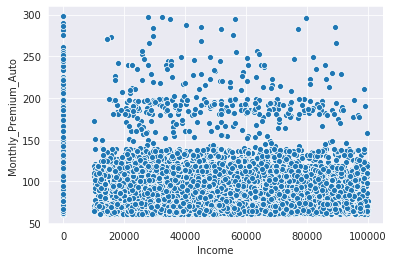

In [111]:
# Initial scatterplot again

sns.set_style('darkgrid')

sns.scatterplot(x = 'Income', y = 'Monthly_Premium_Auto', data = insurance_data)

## Scatterplot With Clusters & Unemployed (Income = 0) Removed

### Income = 0 (Unemployed) Group

In [112]:
# Number Of Unemployed (Income = 0) Out of 1000

insurance_data[insurance_data.Income == 0]['Income'].count()

2317

This is actually quite a lot. This is 248 / 1000 or 24.8% of the existing customers. 

From a retention standpoint this is bad. If customers are unable to make monhtly payments of insurance premiums the policy could be terminated. There would be no more cash coming into the business and the customer cannot claim amounts from a terminated policy.

#### Looking At Customer Lifetime Value When Income = 0

In [0]:
# CLV when income = 0

clv_unemp = insurance_data[insurance_data.Income == 0]['Customer_Lifetime_Value']

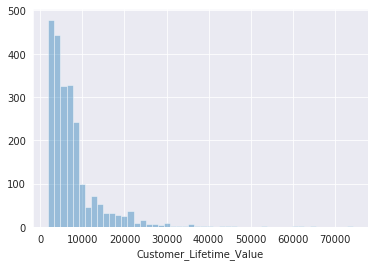

In [114]:
# Distribution of Customer Lifetime Value From Those Unemployed

sns.distplot(clv_unemp, kde = False)

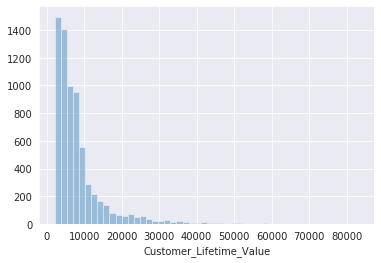

In [115]:
# Distribution of Customer Lifetime Value From Those Income > 0

sns.distplot(insurance_data[insurance_data.Income > 0]['Customer_Lifetime_Value'], 
             kde = False)

In [116]:
kmeans_unemp_inc_mth_df

,Income,Monthly_Premium_Auto,label
0,56274,69,0
2,48767,108,1
4,43836,73,1
5,62902,69,0
6,55350,67,0
...,...,...,...
9127,66367,64,0
9128,47761,104,1
9129,71941,73,0
9130,21604,79,1


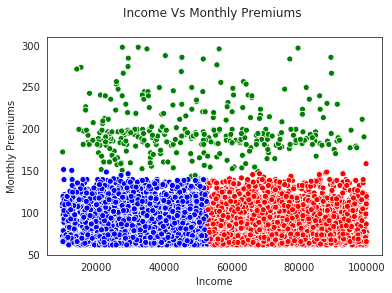

In [117]:
# Scatterplot With 3 clusters:

sns.set_style('white')

sns.scatterplot(x = 'Income',
                y = 'Monthly_Premium_Auto',
                hue = 'label',
                data = kmeans_unemp_inc_mth_df,
                palette = ['r', 'b', 'g'],
                legend = None)

# Legend (Base, High Spenders, Upsell Target)

#legend_labels = ['Upsell Target', 'Big Spenders', 'Base']

plt.xlabel('Income')
plt.ylabel('Monthly Premiums')
plt.title('Income Vs Monthly Premiums \n')
# This legend does not fully work.
#plt.legend(kmeans_unemp_inc_mth_df.label, labels = legend_labels)

plt.savefig('incprem_clusters.png', dpi=300, bbox_inches = "tight")

In [118]:
kmeans_unemp_inc_mth_df.groupby('label').agg({'Income': 
                                           ['count', 'mean', 'median', 'std', 'min', 'max'],
                                        'Monthly_Premium_Auto': 
                                              ['mean', 'median', 'std','min', 'max']})

Income                                     ... Monthly_Premium_Auto                     
       count          mean median           std  ...               median        std  min  max
label                                            ...                                          
0       2885  74118.226690  72988  13349.876945  ...                   79  21.622495   61  158
1       3556  31397.507030  29732  10982.067039  ...                   79  21.729046   61  151
2        376  49153.962766  48528  21690.641864  ...                  193  33.579403  143  297

[3 rows x 11 columns]

## Extracting The Upsell Target Cluster

**What To Show In Presentation**

* Initial Scatterplot
* Clustered Scatterplot (K-Means as shown above)
* Supporting Scatterplots showing why to upsell. (Incr. Monthly Premiums = Incr CLV and to cover for Incr Total Claims Amt)
* Who To Target Within Upsell Target Cluster. Target Those With Larger / Luxury / Sports Cars

In [0]:
# Remove Income = 0 in insurance_data

no_unemp = insurance_data[insurance_data.Income > 0]

In [120]:
no_unemp.head()

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,2764,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
2,AI49188,Nevada,12887,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
4,HB64268,Washington,2814,No,Basic,Bachelor,2002-03-11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5381,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize


In [121]:
# no_unemp df with labels now:

no_unemp['label'] = kmeans_unemp_inc_mth_df['label']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [122]:
no_unemp.head()

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size,label
0,BU79786,Washington,2764,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
2,AI49188,Nevada,12887,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,1
4,HB64268,Washington,2814,No,Basic,Bachelor,2002-03-11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,1
5,OC83172,Oregon,8256,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize,0
6,XZ87318,Oregon,5381,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize,0


In [0]:
# Create new dataframe: upsell_target

upsell_target = no_unemp[no_unemp.label == 2]

In [124]:
# Use .describe():

upsell_target.describe()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount,label
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.0
mean,16256.029255,49153.962766,201.837766,15.571809,49.797872,0.398936,2.811170,903.556286,2.0
std,11835.852922,21690.641864,33.579403,10.523379,27.500722,0.867425,2.411966,437.674617,0.0
min,5667.000000,10105.000000,143.000000,0.000000,0.000000,0.000000,1.000000,0.517753,2.0
25%,7740.000000,29483.250000,181.000000,6.000000,25.000000,0.000000,1.000000,729.291004,2.0
50%,13848.500000,48528.000000,193.000000,14.000000,48.000000,0.000000,2.000000,914.400000,2.0
75%,19161.000000,65794.250000,216.250000,25.000000,73.000000,0.000000,3.000000,1155.600000,2.0
max,83325.000000,99159.000000,297.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.0


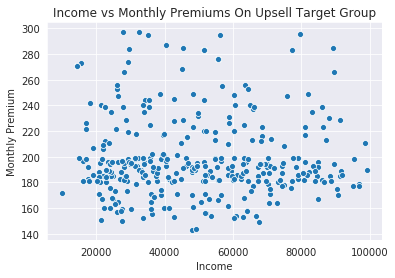

In [125]:
# Upsell target scatterplot

sns.set_style('darkgrid')
sns.scatterplot(x = 'Income', y = 'Monthly_Premium_Auto', data = upsell_target)

plt.xlabel('Income')
plt.ylabel('Monthly Premium')
plt.title('Income vs Monthly Premiums On Upsell Target Group')

plt.savefig('upsell_target_scatter.png', dpi=300, bbox_inches = "tight")

In [126]:
# Within upsell target, find those who have nicer/larger cars 
# (i.e. SUV, sports cars, luxury cars):

upsell_target['Vehicle_Class'].value_counts()

Luxury SUV    138
Luxury Car    120
SUV            84
Sports Car     34
Name: Vehicle_Class, dtype: int64

From the value counts there are about 370 customers with either a Luxury SUV, Luxury Car, SUV or a sports car. We can try to upsell to these customers. At least offer more coverage on insurance policy.

In [127]:
# Within upsell target, find those who have large sized cars:

upsell_target['Vehicle_Size'].value_counts()

Medsize    269
Small       77
Large       30
Name: Vehicle_Size, dtype: int64

Can also to try to upsell to those with large vehicles (30) even though it is not many.